imports

In [1]:
import dataLoader3
from configParser import ConfigParser

params

In [48]:
# defining global variables
experimentName = "test_22987_suffix50_11_dataLoader3_pretrained_depth_resnet50_augmentation"
experimentName2 = None # "test_22987_suffix50_11_splitTest_3"
list_of_sizes_of_interest = [] # 20,50,100

params = ConfigParser(experimentName).read()
print(params)
if experimentName2 is not None:
    params2 = ConfigParser(experimentName2).read()
    print(params2)

{'image_path': '/data/BGNN_data/INHS_cropped', 'suffix': '50_11', 'training_count': 0.64, 'validation_count': 0.16, 'usePretrained': True, 'imageDimension': 224, 'n_channels': 3, 'useZCAWhitening': False, 'useNormalization': False, 'batchSize': 200, 'n_epochs': 1000, 'learning_rate': 0.001, 'numOfTrials': 2, 'patience': 100, 'kernels': [16, 32], 'kernelSize': 5}


pre-defined strings

In [36]:
cleaned_species_csv_fileName = "cleaned_metadata.csv"
species_csv_fileName_header = "fileName"
species_csv_scientificName_header = "scientificName"
species_csv_Genus_header = "Genus"
species_csv_Family_header = "Family"
image_subpath = "images"
species_csv_usedColumns = [species_csv_fileName_header,
                          species_csv_scientificName_header,
                          species_csv_Genus_header,
                          species_csv_Family_header]

Create dataset

In [4]:
datasetManager = dataLoader3.datasetManager(experimentName)
datasetManager.updateParams(params)
dataset = datasetManager.getDataset()

N/A% (0 of 550) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--

Loading dataset...


  0% (4 of 550) |                        | Elapsed Time: 0:00:00 ETA:   0:00:41

Going through image files


100% (550 of 550) |######################| Elapsed Time: 0:01:14 Time:  0:01:14


toggling augmentation,normalization to False False
dataset has a mean: tensor([0.7661, 0.7249, 0.6513], device='cuda:0') and std: tensor([0.1420, 0.1753, 0.2096], device='cuda:0')
toggling augmentation,normalization to True True
file /data/BGNN_data/INHS_cropped/50_11/test_22987_suffix50_11_dataLoader3_pretrained_depth_resnet50_augmentation/tc0.640000_vc0.160000_d224_c3/dataset.pkl written


try to reload dataset

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

dataset = datasetManager.getDataset()
speciesList = dataset.getSpeciesList()
numberOfSpecies = len(speciesList)
print("Number of species = ", numberOfSpecies)
genusList = dataset.getGenusList()
numberOfGenus = len(genusList)
print("Number of species = ", numberOfGenus)

Number of species =  11
Number of species =  5


toggling augmentation,normalization to False False
toggling augmentation,normalization to True True
toggling augmentation,normalization to True False
toggling augmentation,normalization to True True


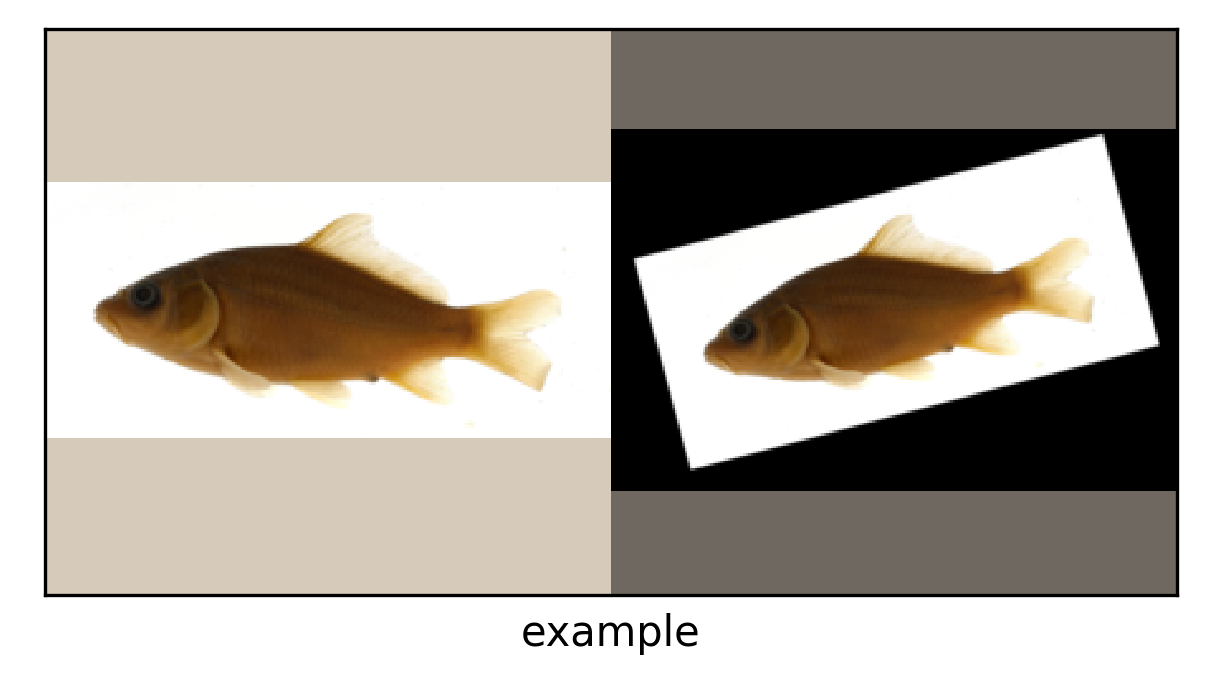

In [7]:
# parameter
example_index = 10

import torch

fig, axes = plt.subplots(1, 1, figsize=(15, 2.5), dpi= 300)
axes.set_xlabel("example")
augmentation, normalization = dataset.toggle_image_loading(augmentation=False, normalization=False)
speciesExample = dataset[example_index]['image'].squeeze()
dataset.toggle_image_loading(augmentation, normalization)
augmentation, normalization = dataset.toggle_image_loading(augmentation=True, normalization=False)
speciesExample2 = dataset[example_index]['image'].squeeze()
dataset.toggle_image_loading(augmentation, normalization)

n_channels = params["n_channels"]
channel = 2 if n_channels != 1 else 1
stitchedImage = torch.cat((speciesExample, speciesExample2), channel)

if n_channels != 1:
    stitchedImage = stitchedImage.permute(1, 2, 0)
axes.set_xticks([])
axes.set_yticks([])
axes.imshow(stitchedImage.cpu().detach().numpy())


Try to reload dataset with changed params

In [8]:
if experimentName2 is not None:
    datasetManager = dataLoader3.datasetManager(experimentName2)
    datasetManager.updateParams(params2)
    dataset = datasetManager.getDataset()
    numberOfSpecies = len(speciesList)
    print("Number of species = ", numberOfSpecies)

Try same experiment but different dataset params

In [9]:
if experimentName2 is not None:
    params2['patience'] = 1000
    print(params2)
    datasetManager.updateParams(params2)
    dataset = datasetManager.getDataset()
    numberOfSpecies = len(speciesList)
    print("Number of species = ", numberOfSpecies)

Get old dataset back

In [10]:
dataset = datasetManager.getDataset()

In [11]:
datasetManager = dataLoader3.datasetManager(experimentName)
datasetManager.updateParams(params)
dataset = datasetManager.getDataset()
print(speciesList)

file /data/BGNN_data/INHS_cropped/50_11/test_22987_suffix50_11_dataLoader3_pretrained_depth_resnet50_augmentation/tc0.640000_vc0.160000_d224_c3/dataset.pkl read
['Lepomis cyanellus', 'Lepomis auritus', 'Carassius auratus', 'Cyprinus carpio', 'Esox americanus', 'Esox lucius', 'Noturus gyrinus', 'Noturus exilis', 'Noturus flavus', 'Noturus eleutherus', 'Noturus insignis']


Data Loader

In [12]:
train_loader, validation_loader, test_loader = datasetManager.getLoaders()

trainingFileNames = []
valFileNames = []
testFileNames = []

for batch in train_loader:
    print(batch['species'])
    print(batch['fileName'])

Loading saved indices...
file /data/BGNN_data/INHS_cropped/50_11/test_22987_suffix50_11_dataLoader3_pretrained_depth_resnet50_augmentation/trainingIndex.pkl read
file /data/BGNN_data/INHS_cropped/50_11/test_22987_suffix50_11_dataLoader3_pretrained_depth_resnet50_augmentation/valIndex.pkl read
file /data/BGNN_data/INHS_cropped/50_11/test_22987_suffix50_11_dataLoader3_pretrained_depth_resnet50_augmentation/testIndex.pkl read
toggling augmentation,normalization to False True
file /data/BGNN_data/INHS_cropped/50_11/test_22987_suffix50_11_dataLoader3_pretrained_depth_resnet50_augmentation/tc0.640000_vc0.160000_d224_c3/trainingLoader.pkl written
file /data/BGNN_data/INHS_cropped/50_11/test_22987_suffix50_11_dataLoader3_pretrained_depth_resnet50_augmentation/tc0.640000_vc0.160000_d224_c3/valLoader.pkl written
file /data/BGNN_data/INHS_cropped/50_11/test_22987_suffix50_11_dataLoader3_pretrained_depth_resnet50_augmentation/tc0.640000_vc0.160000_d224_c3/testLoader.pkl written
tensor([ 5,  1,  9,

In [13]:
for batch in validation_loader:
    print(batch['species'])
    print(batch['fileName'])

tensor([ 6,  2,  7,  5,  3,  1,  0,  5,  4,  3,  1,  5,  3,  5,  3,  2, 10,  1,
        10, 10,  0, 10,  7,  2,  7,  8,  8, 10, 10,  2,  3,  9,  4,  0,  2,  5,
         5,  6,  6,  0,  5,  8,  9,  7,  4,  0,  4,  9,  0,  4,  3,  2,  9, 10,
         2,  8,  3,  6,  0,  8,  9,  7,  4,  6,  8,  9,  3,  1,  1,  7,  1,  6,
         7,  8, 10,  6,  4,  1,  9,  7,  8,  1,  5,  4,  2,  0,  9,  6])
['INHS_FISH_48211.jpg', 'INHS_FISH_25607.jpg', 'INHS_FISH_104982.jpg', 'INHS_FISH_97321.jpg', 'INHS_FISH_47774.jpg', 'INHS_FISH_75258.jpg', 'INHS_FISH_30939.jpg', 'INHS_FISH_77457.jpg', 'INHS_FISH_108310.jpg', 'INHS_FISH_6398.jpg', 'INHS_FISH_51445.jpg', 'INHS_FISH_87589.jpg', 'INHS_FISH_32929.jpg', 'INHS_FISH_50032.jpg', 'INHS_FISH_45318.jpg', 'INHS_FISH_90762.jpg', 'INHS_FISH_74146.jpg', 'INHS_FISH_86895.jpg', 'INHS_FISH_76933.jpg', 'INHS_FISH_49738.jpg', 'INHS_FISH_79838.jpg', 'INHS_FISH_90148.jpg', 'INHS_FISH_47006.jpg', 'INHS_FISH_006548.jpg', 'INHS_FISH_22213.jpg', 'INHS_FISH_85839.jpg', 'INHS_

In [14]:
for batch in test_loader:
    print(batch['species'])
    print(batch['fileName'])

tensor([ 9,  7,  7,  1,  2,  7,  3, 10,  4,  2,  2,  9,  5,  1, 10,  5,  1,  7,
        10,  0,  9,  4,  1,  2,  3,  2,  1,  3,  0,  8,  6, 10,  0,  1,  9,  8,
         0,  4, 10,  9, 10,  7,  7,  3,  1,  3,  6,  7,  0,  9,  3,  3,  0,  5,
         6,  5,  7,  8,  5, 10,  8,  2,  3,  2,  0,  7,  2,  0,  9,  3,  4,  4,
         7,  8,  8,  4,  4,  5,  6,  5,  6,  8,  1,  5,  1,  0,  5,  5,  9,  4,
         1,  6,  4, 10,  3,  8,  8,  0,  9, 10, 10,  6,  9,  4,  2,  6,  8,  6,
         2,  6])
['INHS_FISH_26685.jpg', 'INHS_FISH_63738.jpg', 'INHS_FISH_68083_2.jpg', 'INHS_FISH_59400.jpg', 'INHS_FISH_000757.jpg', 'INHS_FISH_80509.jpg', 'INHS_FISH_100521.jpg', 'INHS_FISH_50043.jpg', 'INHS_FISH_32343.jpg', 'INHS_FISH_57017.jpg', 'INHS_FISH_4916.jpg', 'INHS_FISH_2410.jpg', 'INHS_FISH_4297.jpg', 'INHS_FISH_94583.jpg', 'INHS_FISH_51418.jpg', 'INHS_FISH_99118.jpg', 'INHS_FISH_46194.jpg', 'INHS_FISH_61749.jpg', 'INHS_FISH_87505.jpg', 'INHS_FISH_93197.jpg', 'INHS_FISH_60892.jpg', 'INHS_FISH_25303.j

Try to reload dataloader. You should get same indices.

In [15]:
train_loader, validation_loader, test_loader = datasetManager.getLoaders()

In [16]:
for batch in train_loader:
    print(batch['species'])
    print(batch['fileName'])

tensor([ 5,  6,  1,  7,  5,  9,  0,  3,  3,  7,  1,  7,  9,  7,  0,  0,  5,  5,
         1,  8,  2,  1,  8,  9,  4,  9, 10,  8,  7,  3,  5,  1,  8,  8,  8,  4,
         1,  9,  7,  4,  2,  9,  5,  9,  9, 10,  4,  0,  3,  2,  6,  2,  3,  3,
         2,  2,  6,  5,  8,  5, 10,  4,  8,  7, 10,  3,  5, 10,  2,  2,  5,  6,
         3,  4,  3,  9,  9,  6,  5,  5,  7,  8,  4,  3,  3,  6,  6,  9,  0,  3,
         1,  4,  9,  6,  7,  2,  6, 10,  7,  8, 10,  6, 10,  6,  1, 10,  2,  2,
         6,  4,  4,  7,  2,  5,  4,  8,  8,  3,  3,  8,  4,  2,  5,  5,  6,  4,
        10,  0,  5,  3, 10,  7,  2,  2,  9,  0,  0,  8,  3,  3, 10,  7, 10, 10,
         6,  4,  1,  9, 10,  5,  1,  3,  9,  9,  2,  9,  4,  3,  2,  7,  4,  0,
         6,  8,  6,  3,  7,  7, 10,  9,  8,  2,  4,  4,  9,  7,  0,  3,  1,  8,
         0,  0,  2,  4,  6,  8,  1, 10,  7,  0,  0,  3,  7,  9,  2,  1,  7,  1,
         0, 10])
['INHS_FISH_64109.jpg', 'INHS_FISH_4161.jpg', 'INHS_FISH_59564.jpg', 'INHS_FISH_81018.jpg', 'INHS_FISH_

Plot information about the dataset

        scientificName  count
0    Carassius auratus     50
1      Cyprinus carpio     50
2      Esox americanus     50
3          Esox lucius     50
4      Lepomis auritus     50
5    Lepomis cyanellus     50
6   Noturus eleutherus     50
7       Noturus exilis     50
8       Noturus flavus     50
9      Noturus gyrinus     50
10    Noturus insignis     50


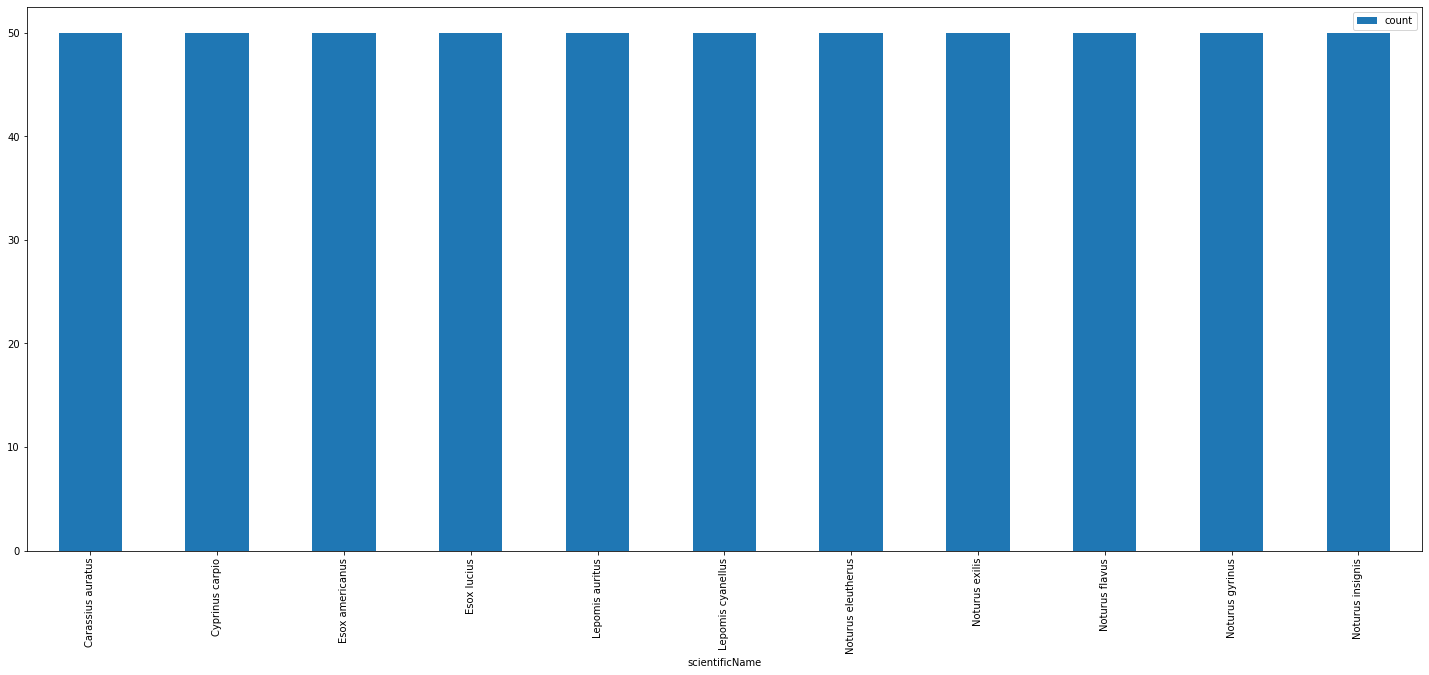

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import os

suffix = str(params["suffix"]) if ("suffix" in params and params["suffix"] is not None) else ""

full_path = os.path.join(params["image_path"], suffix, "count_per_species.csv")
species_count_table = pd.read_csv(full_path).rename(columns={species_csv_fileName_header: "count"})
print(species_count_table)
species_count_table.plot.bar(x=species_csv_scientificName_header, y='count', rot=90, figsize=(25, 10))
plt.savefig(os.path.join(params["image_path"], suffix, "count_per_species.pdf"))

          Family      Genus  count
1     Cyprinidae  Carassius     50
2     Cyprinidae   Cyprinus     50
0  Centrarchidae    Lepomis    100
3       Esocidae       Esox    100
4    Ictaluridae    Noturus    250
               count
Family              
Centrarchidae    100
Cyprinidae       100
Esocidae         100
Ictaluridae      250


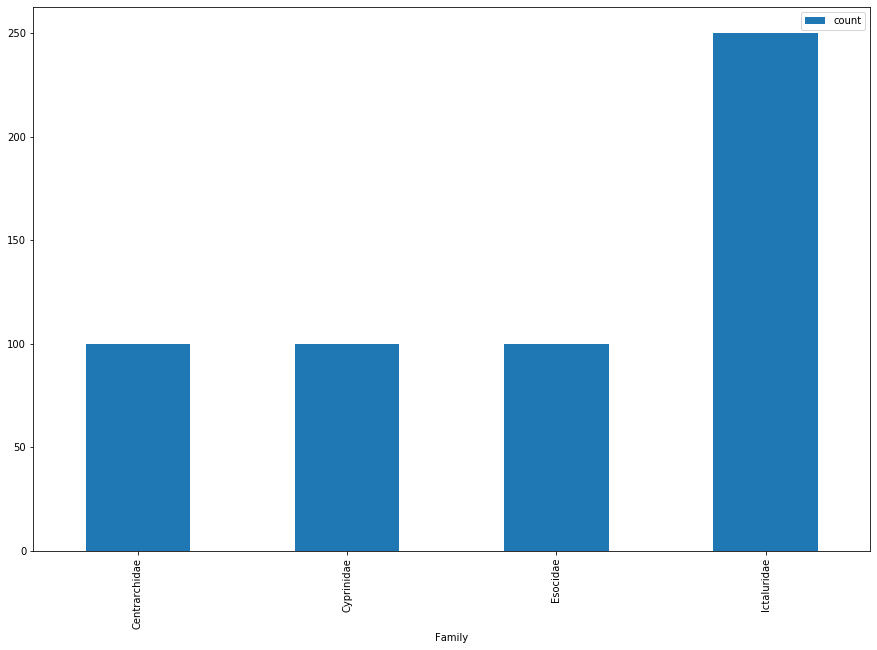

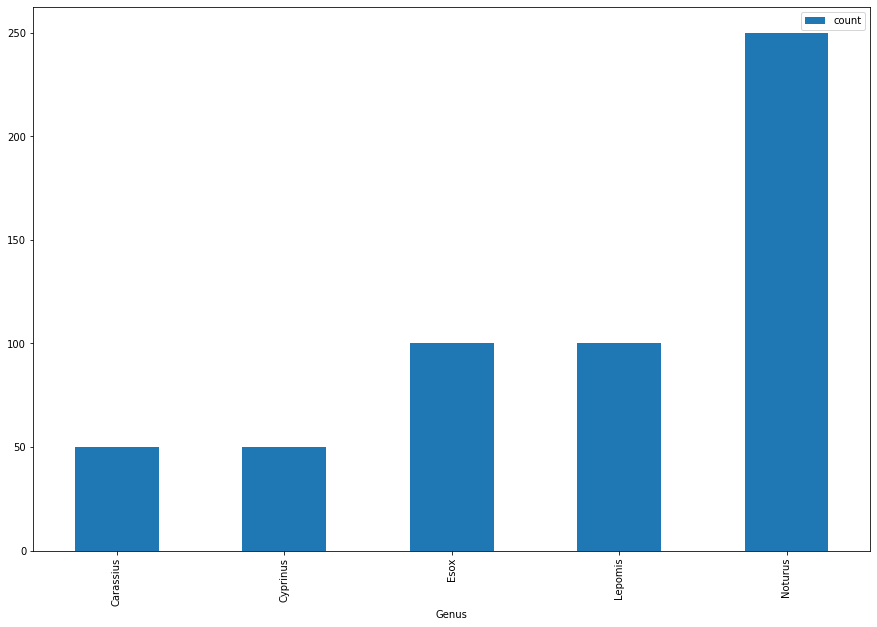

In [20]:
full_path = os.path.join(params["image_path"], suffix, "count_per_family_genis.csv")
family_genis_count_table = pd.read_csv(full_path).rename(columns={species_csv_fileName_header: "count"}).sort_values(by=['count'])
print(family_genis_count_table)
print(family_genis_count_table.groupby(species_csv_Family_header).agg('sum').sort_values(by=['count']))
family_genis_count_table.groupby(species_csv_Family_header).agg('sum').sort_values(by=['count']).plot.bar(rot=90, figsize=(15, 10))
plt.savefig(os.path.join(params["image_path"], suffix, 'count_per_family.pdf'))
family_genis_count_table.groupby(species_csv_Genus_header).agg('sum').sort_values(by=['count']).plot.bar(rot=90, figsize=(15, 10))
plt.savefig(os.path.join(params["image_path"], suffix, 'count_per_genis.pdf'))

Get count matrix

Genus               Carassius  Cyprinus  Esox  Lepomis  Noturus
scientificName                                                 
Carassius auratus          50         0     0        0        0
Cyprinus carpio             0        50     0        0        0
Esox americanus             0         0    50        0        0
Esox lucius                 0         0    50        0        0
Lepomis auritus             0         0     0       50        0
Lepomis cyanellus           0         0     0       50        0
Noturus eleutherus          0         0     0        0       50
Noturus exilis              0         0     0        0       50
Noturus flavus              0         0     0        0       50
Noturus gyrinus             0         0     0        0       50
Noturus insignis            0         0     0        0       50


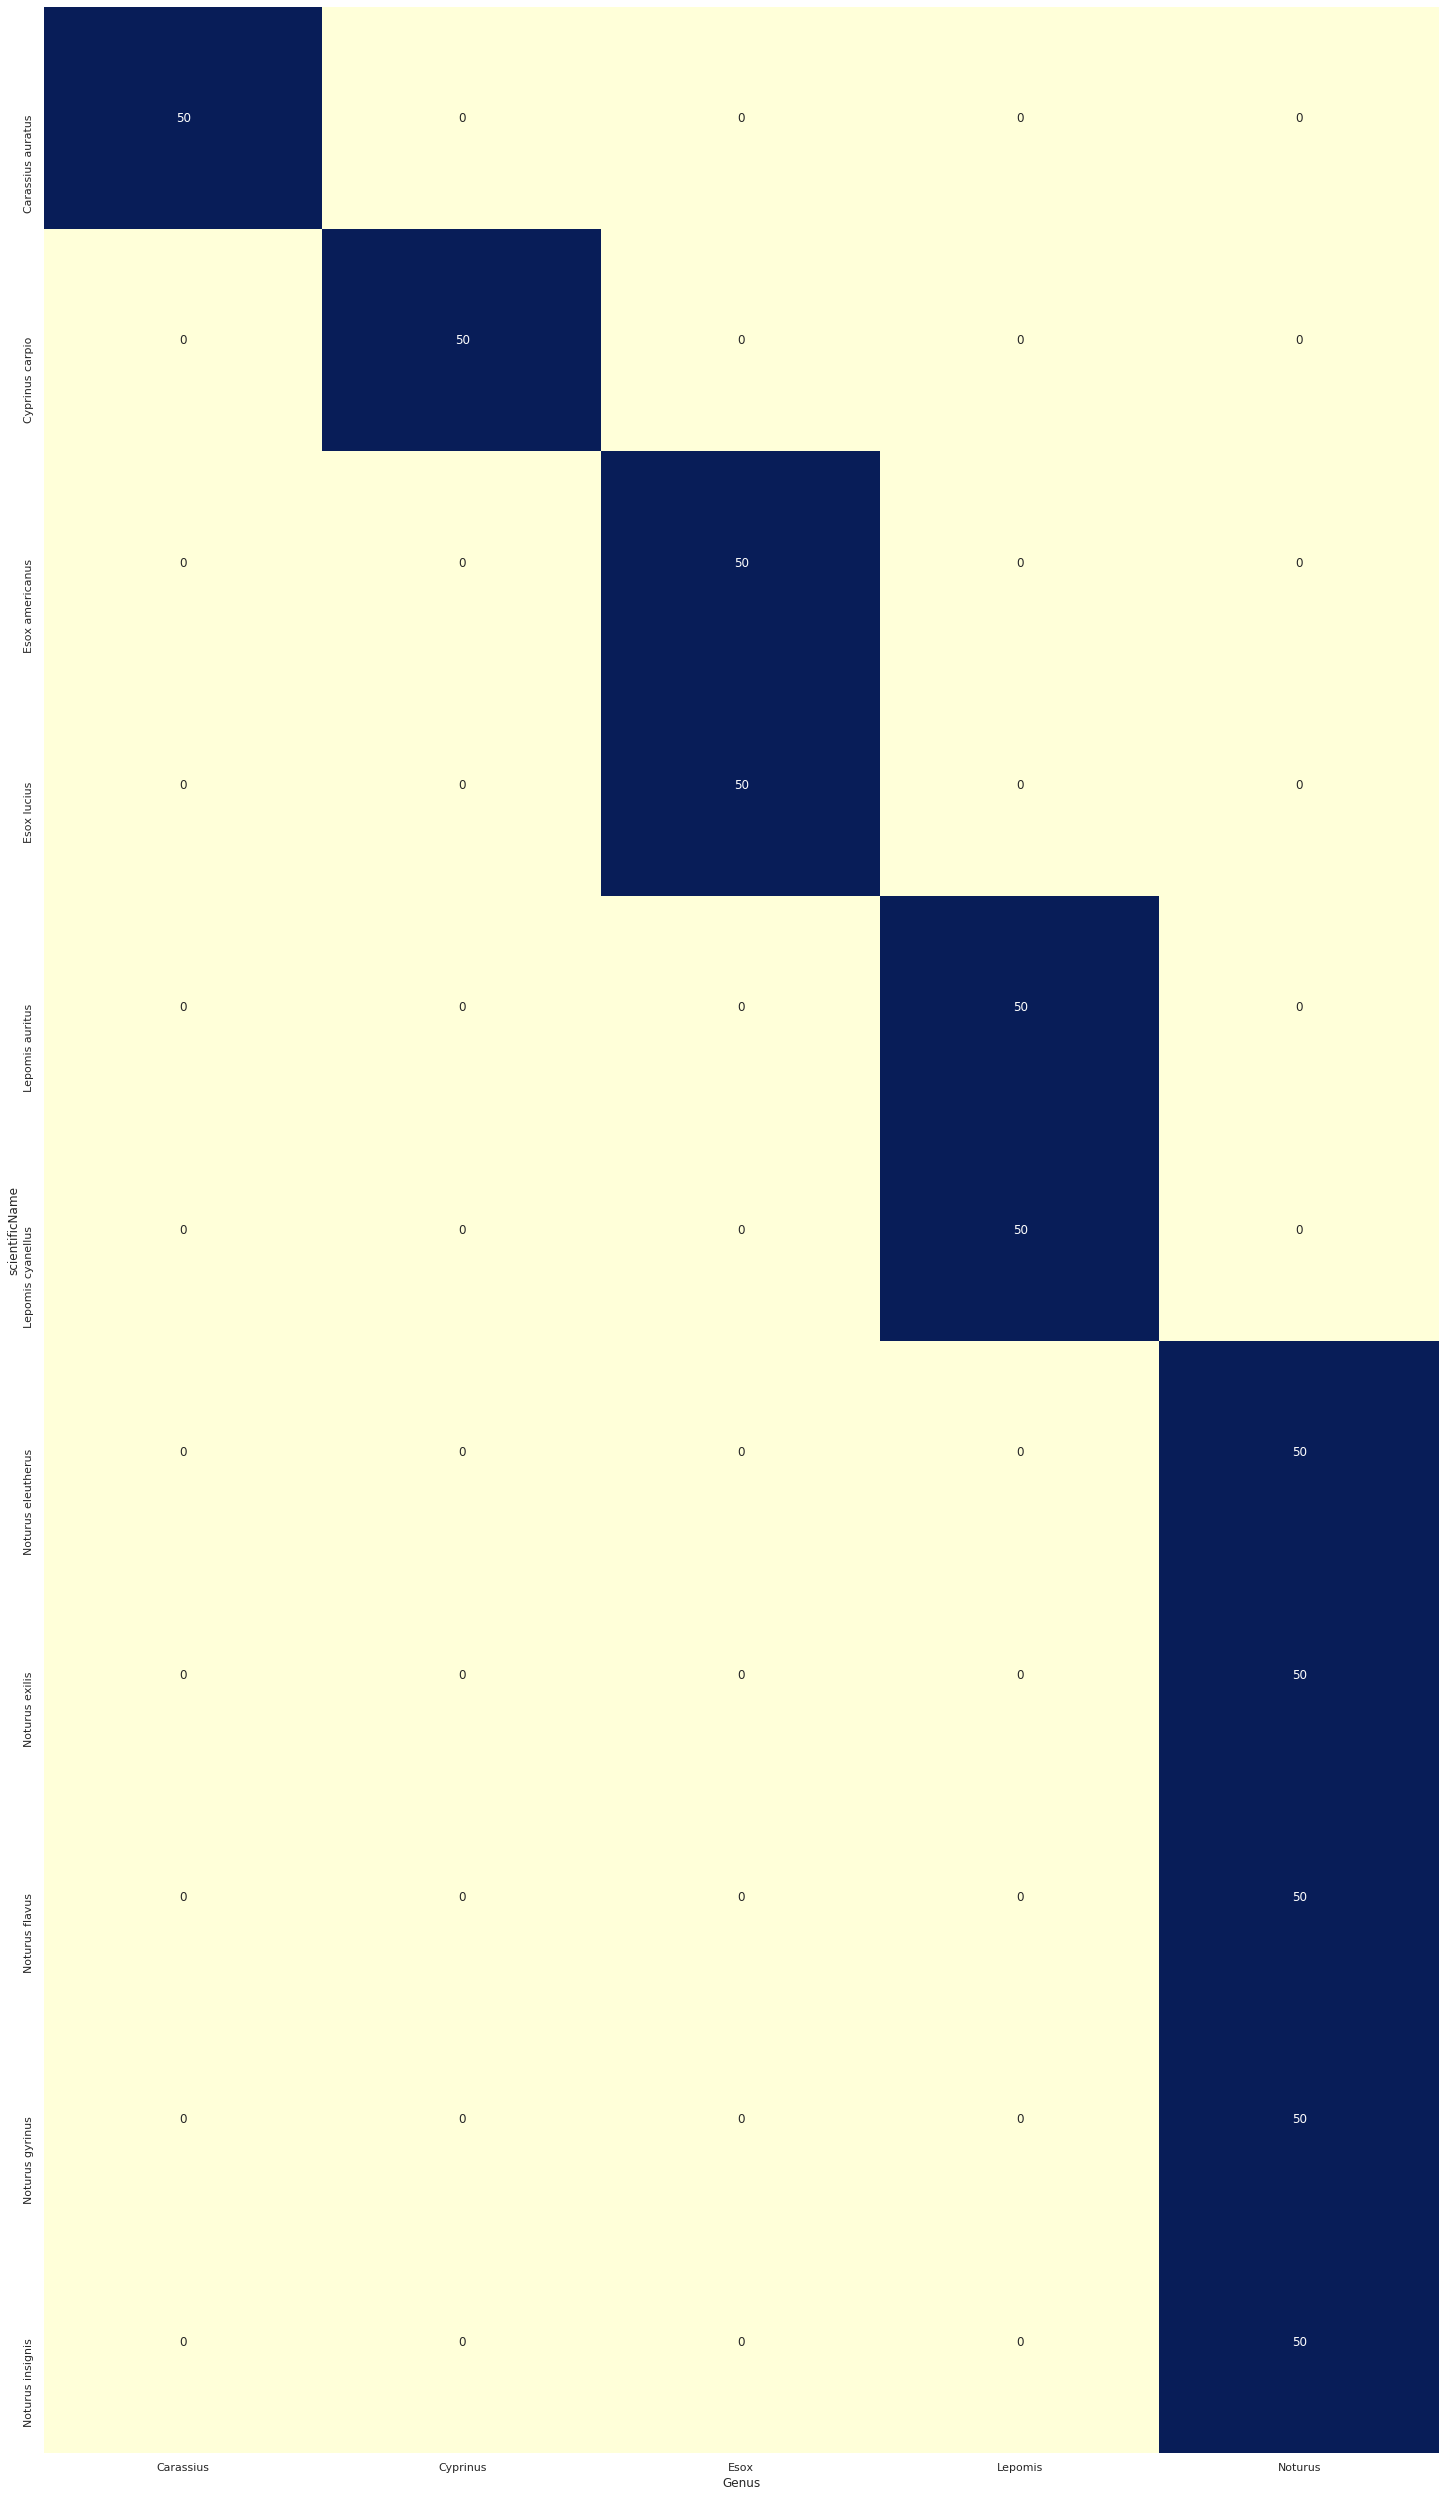

In [21]:
import numpy as np
import seaborn as sns; sns.set()

cleaned_metadata = pd.read_csv(os.path.join(params["image_path"], suffix, cleaned_species_csv_fileName), sep='\t')
species_genis_matrix = cleaned_metadata.groupby([species_csv_scientificName_header, species_csv_Genus_header]).size().unstack(fill_value=0)

print(species_genis_matrix)
fig, ax = plt.subplots(figsize=(25,45))
sns.heatmap(species_genis_matrix, annot=True, fmt="d", ax=ax, cmap="YlGnBu", cbar=False)
plt.savefig(os.path.join(params["image_path"], suffix , 'species_genis_matrix.pdf'))
species_genis_matrix.to_csv(os.path.join(params["image_path"], suffix, 'species_genis_matrix.csv'), sep='\t')

Get most frequent Genuses and clip them to a certain size

In [22]:
import os
for size in list_of_sizes_of_interest:
    sub_path = os.path.join(params["image_path"], str(size))
    if not os.path.exists(sub_path):
            os.makedirs(sub_path)
    # find species with image count more than a threshold
    genus_groupedby_species = cleaned_metadata.groupby([species_csv_Genus_header, species_csv_scientificName_header]).filter(lambda x: x[species_csv_fileName_header].count() >= size)
    genus_groupedby_species = genus_groupedby_species.groupby([species_csv_Genus_header, species_csv_scientificName_header]).agg(len).rename(columns={species_csv_fileName_header: "count"})['count']
    print("\nSpecies of sample size", size)
    print(genus_groupedby_species)
    # get n top for each species
    species_list = genus_groupedby_species.reset_index()['scientificName'].unique()
    trimmed_cleaned_metadata = cleaned_metadata.loc[cleaned_metadata[species_csv_scientificName_header].isin(species_list)].groupby(species_csv_scientificName_header).head(size)
    print(trimmed_cleaned_metadata)
    trimmed_cleaned_metadata.to_csv(os.path.join(sub_path, cleaned_species_csv_fileName), sep="\t", index=False)
    



Get image size statistics

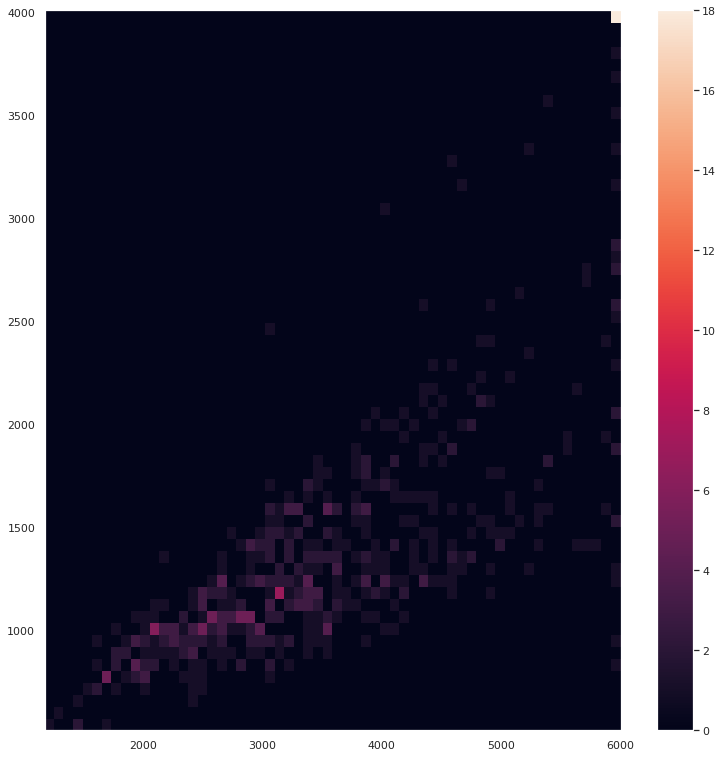

In [37]:
import PIL
from PIL import Image

# Get params
data_root = params["image_path"]
suffix = str(params["suffix"]) if ("suffix" in params and params["suffix"] is not None) else ""

# Get file
cleaned_species_csv_fileName_withsuffix = cleaned_species_csv_fileName
cleaned_species_csv_fileName_full_path = os.path.join(data_root, suffix, cleaned_species_csv_fileName_withsuffix)
cleaned_species_csv_file_exists = os.path.exists(cleaned_species_csv_fileName_full_path)
species_csv = pd.read_csv(cleaned_species_csv_fileName_full_path, delimiter='\t', index_col=species_csv_fileName_header, usecols=species_csv_usedColumns)
img_count = len(species_csv.index)

# Get image sizes
width=[]
height=[]
for indx, row in species_csv.iterrows(): 
    image = PIL.Image.open(os.path.join(data_root,image_subpath,indx))
    w, h = image.size
    width.append(w)
    height.append(h)

# plot histogram
plt.figure(figsize=(10, 10))
plt.hist2d(width, height, bins=60)
plt.subplots_adjust(bottom=0, top=1, left=0, right=1)
plt.colorbar()
plt.show()

Print images per species (visual verification)

['Noturus exilis', 'Noturus flavus', 'Noturus eleutherus']
[489, 122, 84, 293, 434, 68, 536, 467, 467, 218, 129, 542, 43, 31, 461]
toggling augmentation,normalization to False False
toggling augmentation,normalization to True True
toggling augmentation,normalization to False False
toggling augmentation,normalization to True True
toggling augmentation,normalization to False False
toggling augmentation,normalization to True True
toggling augmentation,normalization to False False
toggling augmentation,normalization to True True
toggling augmentation,normalization to False False
toggling augmentation,normalization to True True
toggling augmentation,normalization to False False
toggling augmentation,normalization to True True
toggling augmentation,normalization to False False
toggling augmentation,normalization to True True
toggling augmentation,normalization to False False
toggling augmentation,normalization to True True
toggling augmentation,normalization to False False
toggling augmentat

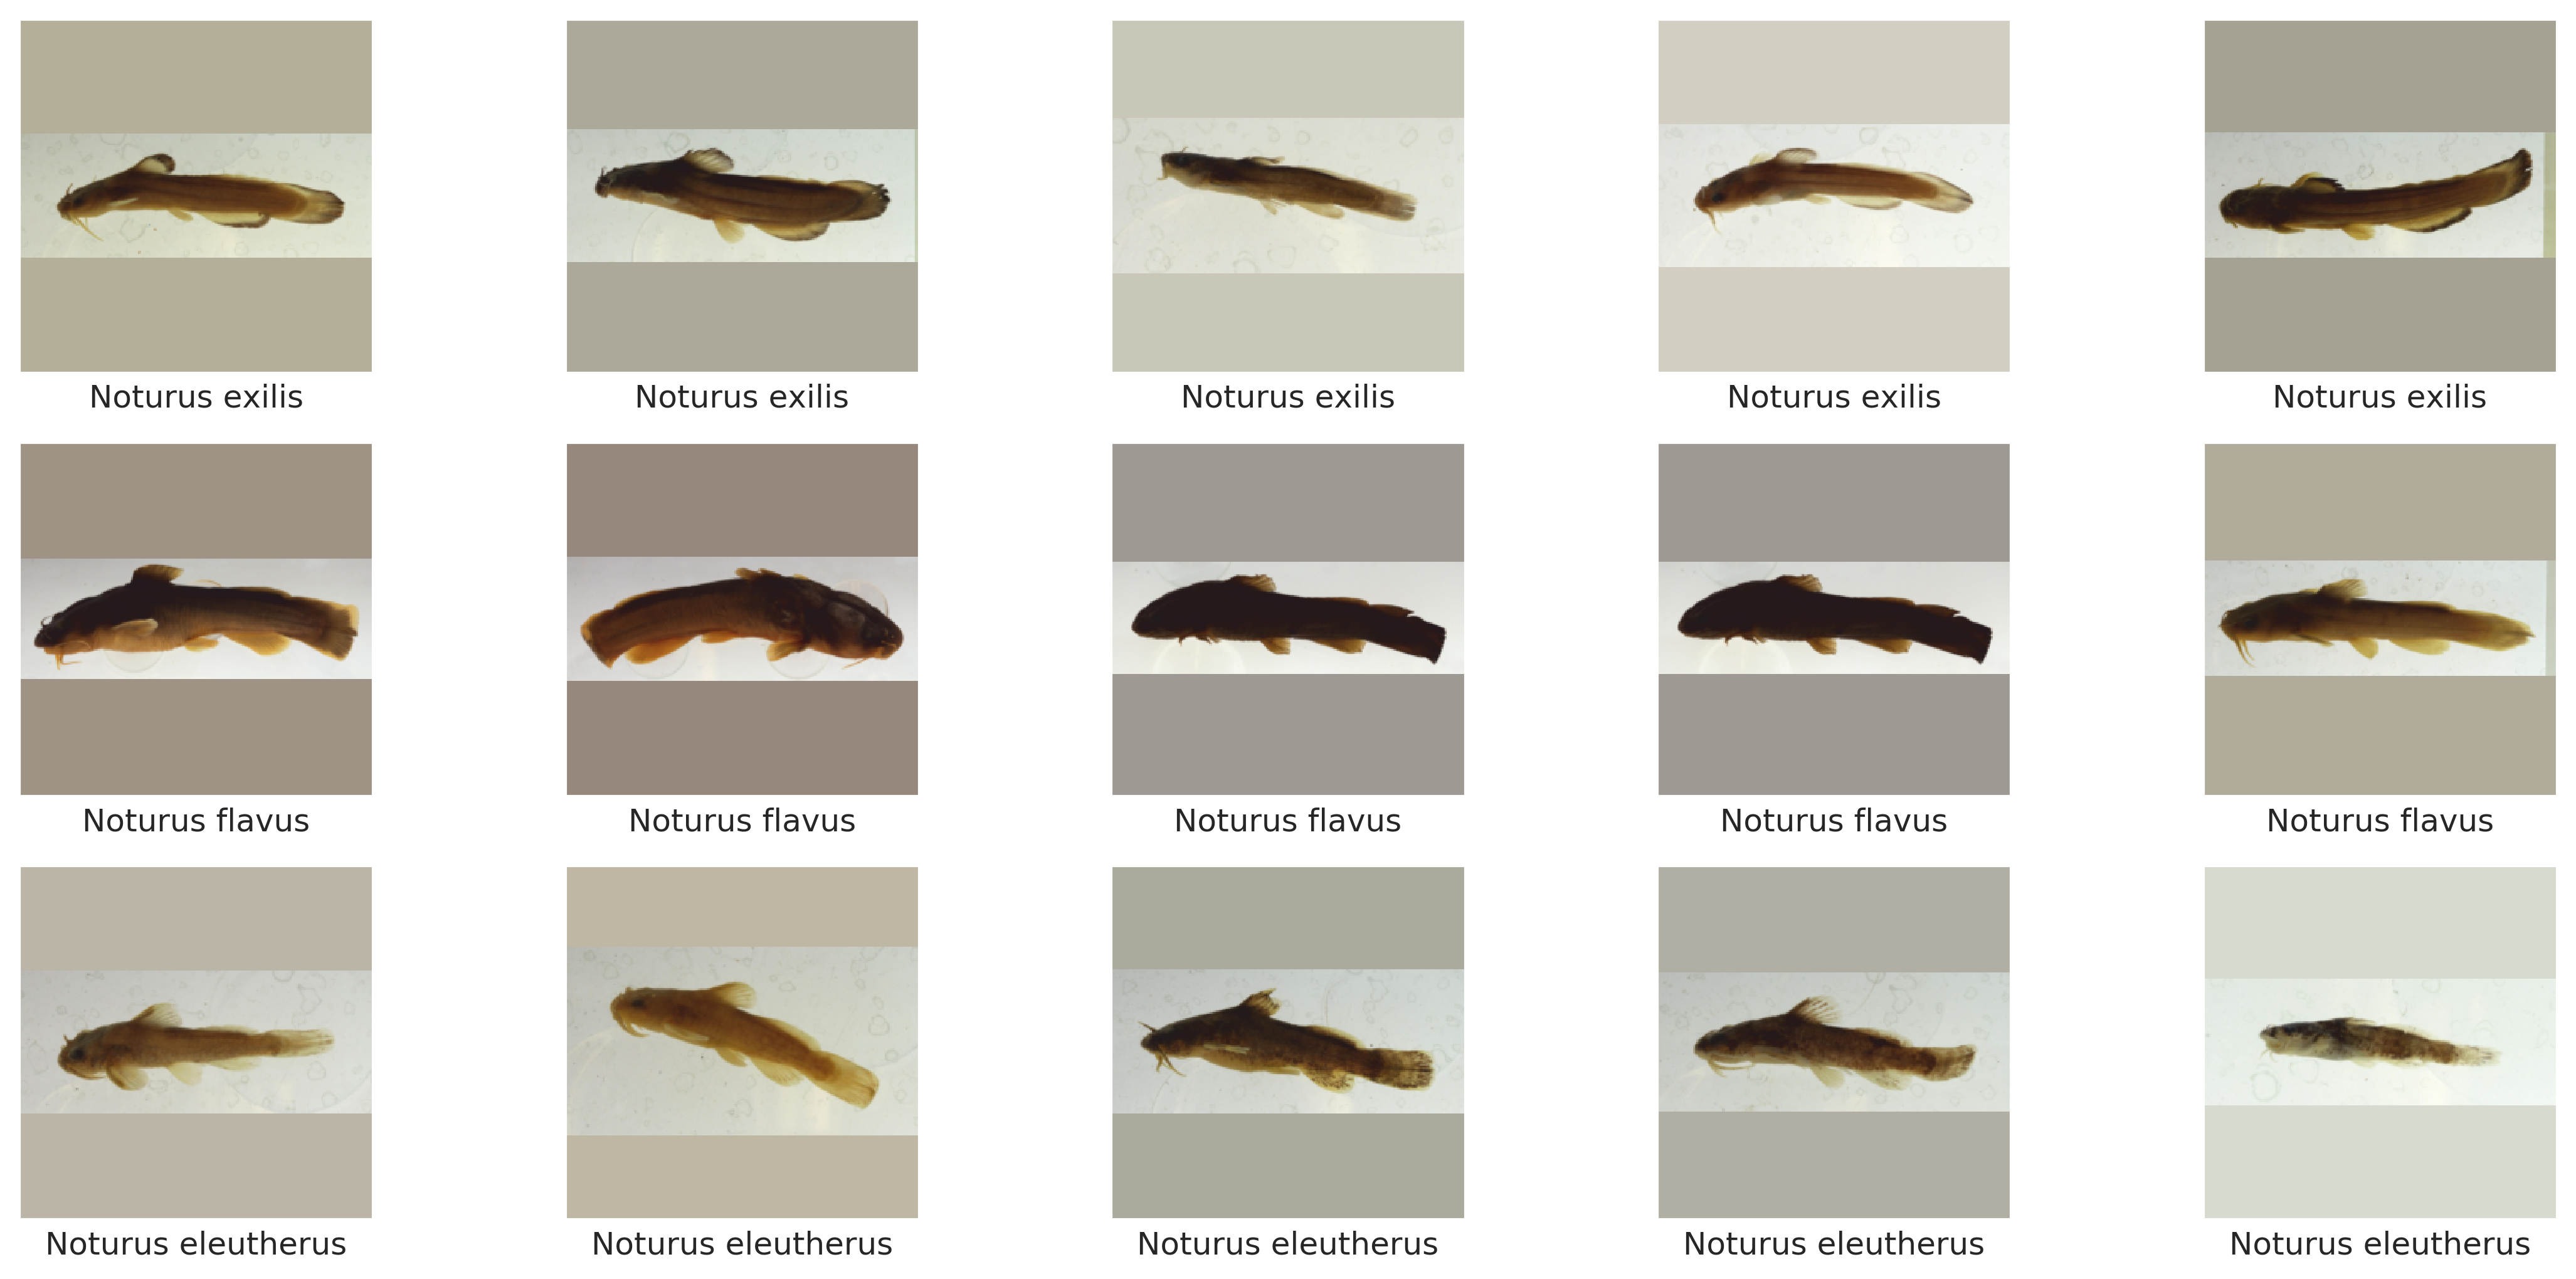

In [58]:
%matplotlib inline

import math
import random

# Parameters: show images of certain species
species_index = [speciesList[7], speciesList[8], speciesList[9]]
num_species = len(species_index)
print(species_index)
limit_per_species = 5

img_indexes = []
for i in species_index:
    img_indexes = img_indexes + random.choices(dataset.getSpeciesIndices(i), k=5)
img_count = len(img_indexes)
# print(img_indexes)

# Plot
number_per_row = 5
n_rows = math.ceil(img_count/number_per_row)
fig, axes = plt.subplots(n_rows, number_per_row, figsize=(15, 2.5*n_rows), dpi= 300)


out_index = 0
in_index = 0
for i, ax in enumerate(axes.flat):
    if i < img_count and i < limit_per_species*num_species:
        
        augmentation, normalization = dataset.toggle_image_loading(augmentation=False, normalization=False)
        obj = dataset[img_indexes[i]]
        image = obj["image"].squeeze()
        dataset.toggle_image_loading(augmentation, normalization)
        
        speciesName = dataset.getSpeciesOfIndex(obj["species"])
        ax.set_xlabel(speciesName)

        n_channels = params["n_channels"]
        if n_channels != 1:
                image = image.permute(1, 2, 0)
                
        ax.imshow(image.cpu().detach().numpy())
        ax.set_xticks([])
        ax.set_yticks([])
    else:
        break
        
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.show()